Nama: Muhammad Raja Fadhil Habib  
NIM: 24060122140131  
LAB: C1


Tugas 2 Praktikum ML C1

1. Lakukanlah clustering menggunakan dataset iris menggunakan fitur 2 dan 3

In [ ]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [ ]:
# URL dataset Iris
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Kolom untuk dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Membaca dataset dari URL
iris_df = pd.read_csv(url, names=names)

# Memilih fitur ke-2 (sepal-width) dan ke-3 (petal-length) untuk clustering
data = iris_df[['sepal-width', 'petal-length']]




In [ ]:
# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# dataset = pd.read_csv(url, header=None)


I. Melakukan Clustering menggunakan Sample Dataset

        1. Import Dataset

In [ ]:
print(data.shape)

(150, 2)


Dataset terdiri dari 150 data dan 2 fitur

In [ ]:
print(data.head(20))

    sepal-width  petal-length
0           3.5           1.4
1           3.0           1.4
2           3.2           1.3
3           3.1           1.5
4           3.6           1.4
5           3.9           1.7
6           3.4           1.4
7           3.4           1.5
8           2.9           1.4
9           3.1           1.5
10          3.7           1.5
11          3.4           1.6
12          3.0           1.4
13          3.0           1.1
14          4.0           1.2
15          4.4           1.5
16          3.9           1.3
17          3.5           1.4
18          3.8           1.7
19          3.8           1.5


Menampilkan 20 data pertama dari dataset iris

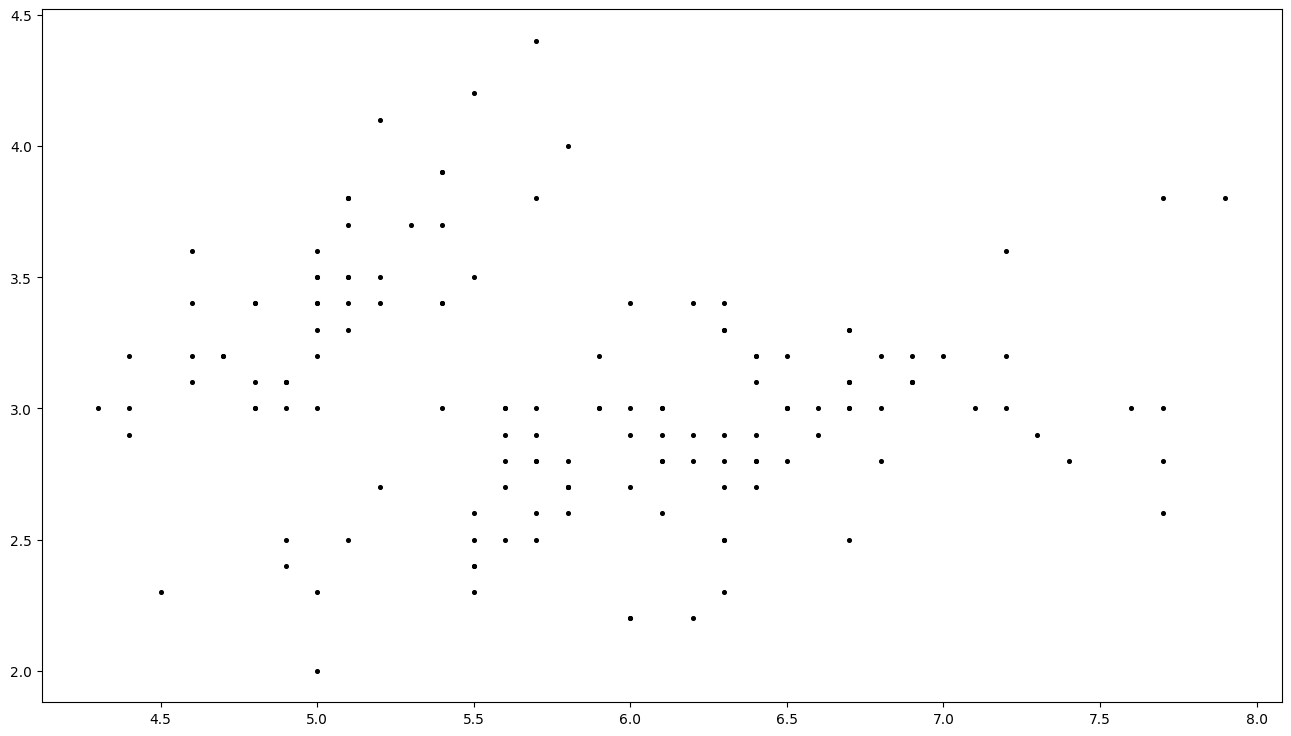

In [ ]:
# Plot dataset menggunakan 'sepal-length' dan 'sepal-width'
f1 = iris_df['sepal-length'].values
f2 = iris_df['sepal-width'].values

# Membuat array dari kedua fitur
X = np.array(list(zip(f1, f2)))

# Scatter plot
plt.scatter(f1, f2, c='black', s=7)



Scatter plot di atas menunjukkan distribusi data dari dataset Iris berdasarkan fitur **panjang kelopak bunga (sepal-length)** pada sumbu x dan **lebar kelopak bunga (sepal-width)** pada sumbu y. Setiap titik pada plot merepresentasikan satu sampel bunga dari dataset, di mana seluruh titik diwarnai hitam karena belum dikelompokkan berdasarkan label kelasnya. Dataset ini terdiri dari tiga jenis bunga: Iris-setosa, Iris-versicolor, dan Iris-virginica, yang secara alami membentuk kelompok tertentu. Dari visualisasi ini, terlihat pola distribusi data yang menunjukkan adanya kemungkinan cluster alami. Beberapa titik tampak terpusat membentuk kelompok yang saling terpisah, namun terdapat juga beberapa titik yang berada di antara kelompok, menunjukkan kemungkinan tumpang tindih antara kelas yang berbeda. Fitur `sepal-length` dan `sepal-width` memberikan gambaran awal untuk analisis clustering, meskipun dalam analisis lebih lanjut, fitur lain seperti `petal-length` dan `petal-width` sering kali memberikan pemisahan yang lebih jelas di dataset Iris.

     2. Melakukan Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)

labels = kmeans.predict(X)
C = kmeans.cluster_centers_
print(C)

[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.418     ]]


Hasil dari algoritma K-Means menunjukkan bahwa dataset telah dikelompokkan ke dalam 3 cluster, dengan koordinat pusat (centroid) untuk setiap cluster sebagai berikut: **[6.8128, 3.0745]**, **[5.7736, 2.6925]**, dan **[5.006, 3.418]**. Centroid ini merupakan titik rata-rata dari semua data dalam cluster yang bersangkutan, dihitung berdasarkan fitur **panjang kelopak bunga (sepal-length)** dan **lebar kelopak bunga (sepal-width)**. Nilai-nilai tersebut menggambarkan representasi pusat dari setiap cluster yang dihasilkan. Cluster pertama memiliki panjang kelopak bunga lebih besar dibandingkan cluster lainnya, sedangkan cluster ketiga memiliki lebar kelopak bunga yang lebih besar. Posisi centroid ini memberikan gambaran umum tentang distribusi data dan bagaimana algoritma K-Means mengelompokkan data berdasarkan kedekatan jarak Euclidean ke centroid tersebut.

     3. Plot hasil Clustering

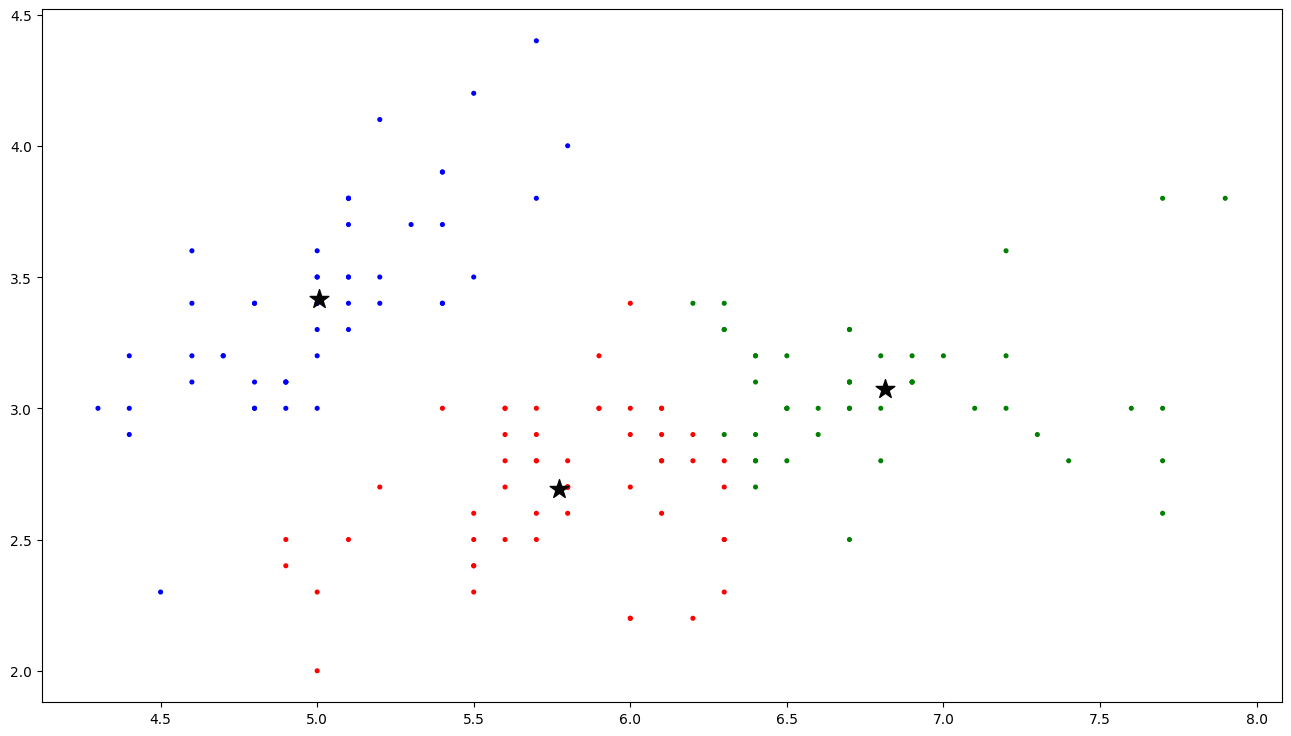

In [ ]:
colors = ['green', 'red', 'blue']
plt.scatter(X[:, 0], X[:, 1], s=7, c=[colors[label] for label in labels])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

hasil clustering menggunakan algoritma K-Means pada dataset Iris berdasarkan dua fitur, yaitu panjang kelopak bunga (sepal-length) pada sumbu x dan lebar kelopak bunga (sepal-width) pada sumbu y. Pada scatter plot ini, data telah dikelompokkan menjadi tiga cluster, yang ditunjukkan dengan warna hijau, merah, dan biru.

Setiap titik mewakili satu sampel data, sedangkan tanda bintang hitam (*) menunjukkan posisi centroid dari masing-masing cluster. Centroid merupakan titik pusat dari cluster yang dihitung berdasarkan rata-rata koordinat semua titik dalam cluster tersebut. Posisi centroid dalam plot ini adalah sebagai berikut:

Centroid cluster biru: sekitar [5.006, 3.418].
Centroid cluster merah: sekitar [5.774, 2.692].
Centroid cluster hijau: sekitar [6.813, 3.074].
Distribusi cluster terlihat cukup jelas, di mana setiap cluster menunjukkan kelompok data yang relatif homogen berdasarkan kedekatan jarak Euclidean ke centroid masing-masing. Namun, terdapat beberapa titik yang berada di dekat batas antar-cluster, yang mungkin mengindikasikan tumpang tindih atau keterkaitan antara cluster yang berdekatan. Scatter plot ini memberikan gambaran visual tentang bagaimana data dikelompokkan oleh algoritma K-Means.

II. Melakukan Clustering Menggunakan Generate Dataset





     1. Menggenerate Dataset

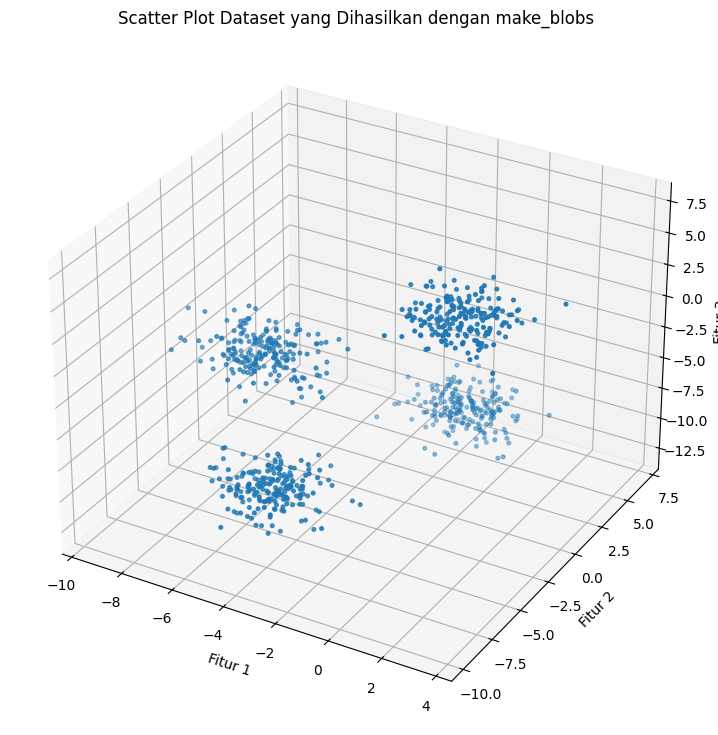

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

# Mengatur ukuran plot
plt.rcParams['figure.figsize'] = (16, 9)

# Men-generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=1)

# Membuat figure dan menambahkan plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Tambahkan `projection='3d'`

# Scatter plot untuk data dalam ruang 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=7)

# Menambahkan label sumbu
ax.set_xlabel('Fitur 1')
ax.set_ylabel('Fitur 2')
ax.set_zlabel('Fitur 3')

# Menambahkan judul
ax.set_title('Scatter Plot Dataset yang Dihasilkan dengan make_blobs')

# Menampilkan plot
plt.show()


visualisasi scatter plot dataset yang dihasilkan menggunakan fungsi make_blobs dari scikit-learn dalam ruang 3D. Dataset ini terdiri dari 800 sampel yang terdistribusi ke dalam 4 cluster, masing-masing dihasilkan secara acak tetapi dikontrol menggunakan parameter random_state=1 untuk memastikan hasil konsisten di setiap eksekusi.

Setiap titik dalam plot mewakili satu sampel data, dan koordinatnya ditentukan oleh tiga fitur (Fitur 1, Fitur 2, dan Fitur 3). Scatter plot ini dibuat menggunakan Axes3D dari mpl_toolkits.mplot3d, memungkinkan visualisasi dataset dalam ruang 3 dimensi.

    2. Melakukan Clustering

In [ ]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

implementasi algoritma K-Means Clustering untuk mengelompokkan dataset yang dihasilkan sebelumnya (X) menjadi 4 cluster. Proses dimulai dengan inisialisasi objek KMeans dari library scikit-learn, dengan parameter n_clusters=4 yang menentukan jumlah cluster yang diinginkan. Selanjutnya, metode .fit(X) digunakan untuk melatih model K-Means pada dataset X, di mana algoritma akan secara iteratif menentukan posisi centroid dari keempat cluster tersebut. Setelah model dilatih, metode .predict(X) digunakan untuk memprediksi cluster label untuk setiap sampel dalam dataset, yang berarti setiap titik data akan ditetapkan ke salah satu dari empat cluster berdasarkan kedekatan jaraknya dengan centroid. Akhirnya, centroid dari setiap cluster dapat diakses melalui atribut .cluster_centers_, yang berisi koordinat centroid dalam ruang fitur. Centroid ini mewakili pusat dari setiap cluster dan digunakan untuk mendefinisikan struktur kelompok data. Kode ini secara keseluruhan bertujuan untuk membagi dataset menjadi empat kelompok berdasarkan kesamaan dalam ruang fitur.

    3. Plot hasil clustering

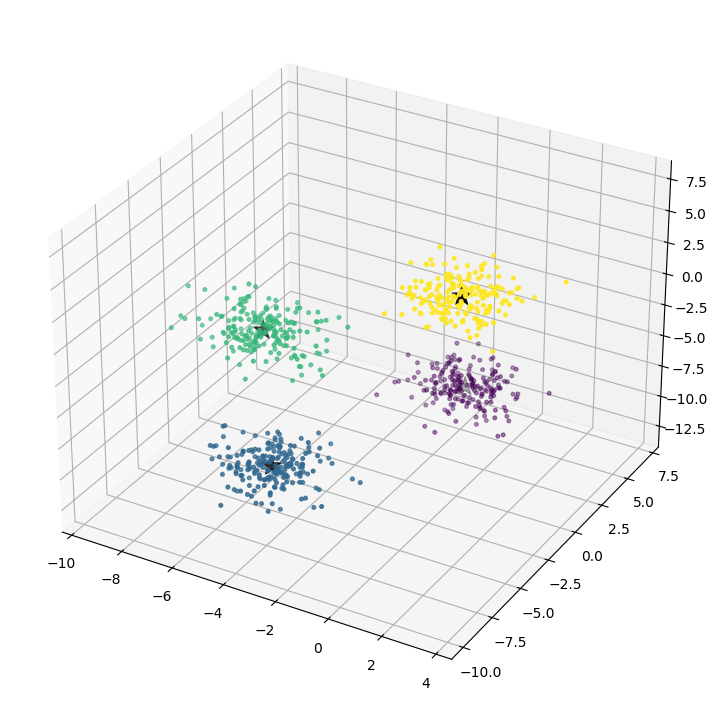

In [ ]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=7)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=200)

visualisasi hasil clustering dalam ruang 3D menggunakan algoritma K-Means. Pada plot ini, dataset telah dikelompokkan ke dalam 4 cluster, di mana setiap cluster diwakili oleh warna yang berbeda (kuning, ungu, biru, dan hijau) sesuai dengan label prediksi yang dihasilkan oleh model. Data divisualisasikan berdasarkan tiga fitur dari dataset (Fitur 1, Fitur 2, dan Fitur 3), yang direpresentasikan pada sumbu x, y, dan z.

Setiap titik pada plot menunjukkan satu sampel data, dan pewarnaan berdasarkan nilai cluster label membantu dalam mengidentifikasi kelompok data yang serupa. Centroid dari masing-masing cluster ditampilkan menggunakan simbol bintang hitam (*), yang menunjukkan posisi pusat dari setiap cluster yang dihitung oleh algoritma K-Means. Centroid ini adalah representasi rata-rata posisi titik-titik dalam cluster dan berfungsi sebagai referensi utama untuk membagi data berdasarkan jarak terdekat (Euclidean distance).

Plot ini memperlihatkan bahwa algoritma berhasil memisahkan dataset menjadi 4 kelompok yang terdefinisi dengan baik, dengan setiap cluster memiliki distribusi data yang cukup padat di sekitar centroid-nya. Visualisasi ini sangat membantu dalam mengevaluasi performa algoritma K-Means dan menunjukkan bagaimana data telah dikelompokkan dalam ruang 3D.

2. Lakukan evaluasi hasil clustering menggunakan inertia
(SSE) dan silhouette coefficient!


III. Melakukan Evaluasi Clustering

In [ ]:
for k in range (1, 10):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Mendapatkan jumlah jarak antara setiap sample dengan centroidnya
  inertia = kmeans.inertia_
  print ("k:",k, "cost:", inertia)

k: 1 cost: 44014.557684029685
k: 2 cost: 24760.507276619726
k: 3 cost: 8302.670699876155
k: 4 cost: 2407.3910793453674
k: 5 cost: 2259.6047621724792
k: 6 cost: 2125.1781136523446
k: 7 cost: 2007.5645969149678
k: 8 cost: 1867.6106916660565
k: 9 cost: 1726.1824648099584


Menggunakan Elbow Method untuk mengevaluasi jumlah cluster (k) yang optimal pada dataset dengan menghitung inertia (SSE - Sum of Squared Errors) untuk berbagai nilai k. Inertia adalah jumlah total kuadrat jarak antara setiap titik data dengan centroid cluster yang sesuai. Nilai inertia menggambarkan seberapa baik data dikelompokkan; semakin kecil nilai inertia, semakin baik data terkelompok dalam cluster.
Penjelasan Hasil:

Hasil menunjukkan nilai inertia yang berkurang secara signifikan saat jumlah cluster (k) meningkat:

Ketika k=1, inertia sangat tinggi (44014.56) karena semua data dianggap berada dalam satu cluster besar, sehingga jarak antara data dan centroid menjadi sangat besar.
Saat k meningkat, inertia menurun tajam, terutama dari k=1 ke k=4. Ini menunjukkan bahwa penambahan jumlah cluster pada tahap ini secara signifikan meningkatkan pengelompokan data.
Setelah k=4, penurunan inertia menjadi lebih lambat, yang menunjukkan bahwa menambahkan cluster tambahan memberikan manfaat yang semakin kecil dalam meminimalkan jarak.

Elbow Method:
Dari hasil ini, tampak bahwa nilai inertia menurun drastis hingga k=4, setelah itu penurunan melambat. Ini menunjukkan adanya "titik siku" (elbow) pada k=4, yang dapat dianggap sebagai jumlah cluster yang optimal. Pada k=4, data sudah cukup baik dikelompokkan, dan menambahkan cluster lebih lanjut tidak memberikan peningkatan signifikan pada hasil clustering.

    Evaluasi hasil cluster menggunakan silhouette coefficient

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.22550942063594356

Silhouette Score yang dihasilkan dari proses clustering adalah **0.2255**, yang menunjukkan bahwa kualitas pengelompokan data relatif rendah. Nilai ini berada pada rentang antara 0 hingga 1, di mana nilai mendekati 1 mengindikasikan cluster yang sangat baik, sedangkan nilai mendekati 0 menunjukkan bahwa data berada di batas antar-cluster, sehingga pengelompokan tidak terlalu jelas. Dengan nilai 0.2255, hasil clustering menunjukkan bahwa banyak data mungkin berada di dekat batas cluster atau ada tumpang tindih antar cluster. Hal ini dapat terjadi karena distribusi data yang tidak sepenuhnya terpisah atau karena pemilihan jumlah cluster (`k`) yang kurang optimal. Untuk meningkatkan hasil clustering, evaluasi lebih lanjut seperti mencoba nilai `k` yang berbeda atau menggunakan algoritma clustering lain dapat dilakukan.

3. Tentukan juga jumlah K dengan elbow method!


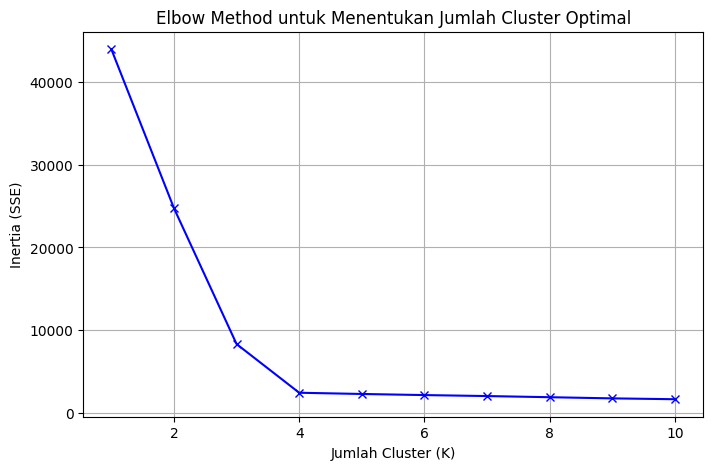

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mencari nilai inertia untuk berbagai K
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()


hasil dari Elbow Method yang memplot hubungan antara jumlah cluster (K) dengan nilai Inertia (SSE). Inertia menggambarkan total kuadrat jarak antara setiap titik data dengan centroid cluster-nya, yang menjadi indikator seberapa baik data dikelompokkan. Dari grafik tersebut, terlihat bahwa nilai inertia menurun tajam saat jumlah cluster meningkat dari K=1 hingga K=4, menunjukkan bahwa pembagian cluster menjadi lebih efektif dengan penambahan cluster. Namun, setelah K=4, penurunan nilai inertia menjadi lebih lambat, yang berarti penambahan cluster tambahan tidak memberikan pengurangan inertia yang signifikan.

Titik siku (elbow) pada grafik, yang berada di K=4, mengindikasikan jumlah cluster optimal. Pada titik ini, model mencapai keseimbangan antara pengurangan inertia dan jumlah cluster, sehingga menambahkan lebih banyak cluster hanya akan memberikan manfaat yang sangat kecil dibandingkan kompleksitas yang bertambah. Oleh karena itu, berdasarkan hasil ini, jumlah cluster yang optimal untuk dataset adalah 4, dan nilai ini dapat digunakan untuk melakukan clustering pada langkah selanjutnya. Elbow Graph ini membantu memberikan visualisasi yang intuitif dalam menentukan jumlah cluster optimal untuk dataset.

4. Plot hasil cluster dengan nilai K yang anda pilih dengan scatterplot!


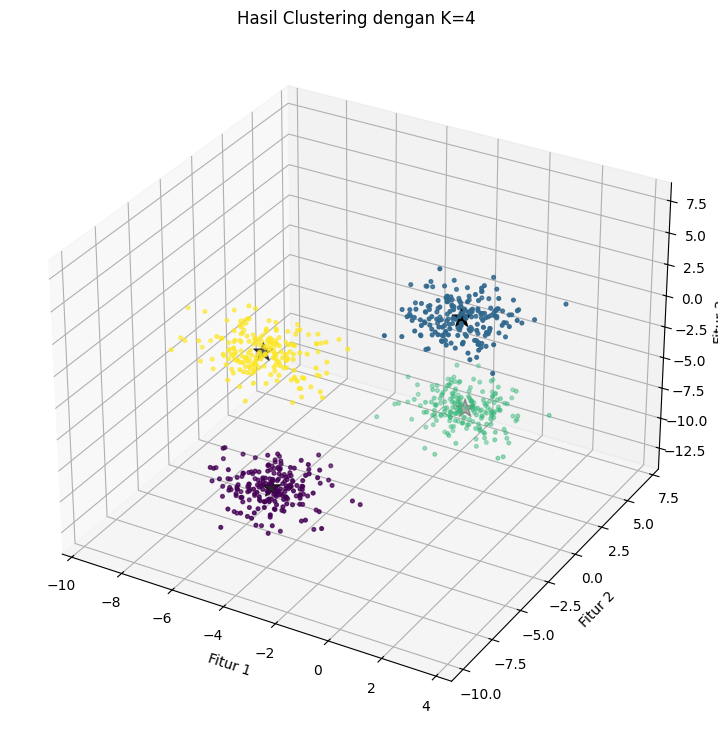

In [ ]:
# Clustering dengan K optimal (misalnya K=4 dari hasil Elbow Method)
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=1)
kmeans_optimal.fit(X)
labels_optimal = kmeans_optimal.predict(X)
centroids_optimal = kmeans_optimal.cluster_centers_

# Plot hasil clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_optimal, cmap='viridis', s=7)
ax.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], centroids_optimal[:, 2],
           marker='*', c='black', s=200)

# Menambahkan label sumbu
ax.set_xlabel('Fitur 1')
ax.set_ylabel('Fitur 2')
ax.set_zlabel('Fitur 3')
ax.set_title('Hasil Clustering dengan K=4')
plt.show()


hasil clustering dataset ke dalam 4 cluster berdasarkan hasil dari Elbow Method yang menunjukkan bahwa K=4 adalah jumlah cluster optimal. Scatter plot dalam ruang 3D menampilkan data yang telah dikelompokkan, di mana setiap cluster diwakili oleh warna yang berbeda (misalnya, kuning, ungu, biru, dan hijau). Titik-titik data dalam cluster memiliki kedekatan dengan centroid masing-masing, yang dihitung oleh algoritma K-Means sebagai pusat dari cluster. Centroid cluster ditampilkan dengan simbol bintang hitam (*), yang menunjukkan posisi rata-rata koordinat data dalam setiap cluster.

Clustering ini menunjukkan pembagian data yang jelas, dengan masing-masing cluster memiliki distribusi yang terpisah, mencerminkan keberhasilan model dalam memisahkan dataset berdasarkan kesamaan fitur. Hasil ini mengonfirmasi bahwa data memiliki pola distribusi alami yang sesuai dengan jumlah cluster yang ditemukan. Visualisasi ini sangat membantu dalam memahami bagaimana data dikelompokkan oleh algoritma K-Means, serta mengidentifikasi struktur kelompok yang tersembunyi dalam dataset. Judul dan label pada sumbu memberikan konteks tambahan untuk interpretasi plot.